In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import glob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import sys

In [6]:
#Diccionario de Albumes y Abreviaciones
Albums = {''}

In [7]:
#Paleta de colores de "A Rush of Blood of the Head"
Colors = {'A Rush of Blood to the Head':{'bg':'#F2F2F2',
                                         'words':['#D9D9D9', '#A6A6A6', '#737372', '#404040']},
          'Music of the Spheres':{'bg':'#0F132C',
                                  'words':['#F2D027', '#579870', '#368FD3', '#D421A1']},
          'Parachutes':{'bg':'#0D0000',
                        'words':['#F2AC57', '#F28322', '#F26B1D', '#D92818']}}

In [25]:
#Se leen y concatenan todos los reportes del folder "Estadísticos"
all_songs = glob.glob("A Rush of Blood to the Head/*.txt")

songs_dict = {}

for song in all_songs:
    lyrics = open(song, "r", encoding='utf-8')
    data = lyrics.read()
    songs_dict[song]=data
    lyrics.close()

In [26]:
songs_df = pd.DataFrame(list(songs_dict.items()),columns=['song','lyrics'])
songs_df[['album', 'song']] = songs_df['song'].str.split('\\', expand=True)
songs_df['song'] = songs_df['song'].str[:-4]
songs_df

,song,lyrics,album
0,A Rush of Blood of the Head,"He said, ""I'm gonna buy this place and burn it...",A Rush of Blood to the Head
1,A Whisper,"A whisper, a whisper, a whisper, a whisper\nA ...",A Rush of Blood to the Head
2,Amsterdam,"Come on, oh, my star is fading\nAnd I swerve o...",A Rush of Blood to the Head
3,Clocks,The lights go out and I can't be saved\nTides ...,A Rush of Blood to the Head
4,Daylight,"To my surprise, and my delight\nI saw sunrise,...",A Rush of Blood to the Head
5,God Put a Smile Upon Your Face,Where do we go? Nobody knows\nI've got to say ...,A Rush of Blood to the Head
6,Green Eyes,"Honey, you are a rock\nUpon which I stand\nAnd...",A Rush of Blood to the Head
7,In My Place,"In my place, in my place\nWere lines that I co...",A Rush of Blood to the Head
8,Politik,Look at earth from outer space\nEveryone must ...,A Rush of Blood to the Head
9,The Scientist,"Come up to meet you, tell you I'm sorry\nYou d...",A Rush of Blood to the Head


In [27]:
lyrics_album = ' '.join(songs_df['lyrics'])
lyrics_album = lyrics_album.translate ({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})

In [28]:
custom_stopwords = set(["i’m", "it’s", "you're", "i’d", "we’re", "you’re", "i’ll", "we’ll", "you’ve", 'ohohohoh', 'i…', "didn’t", 'oh', "there’s", 'la', 'oh', 'ooh'])

In [29]:
lyrics_album_lower = lyrics_album.lower()
lyrics_album_list = lyrics_album_lower.split()

stopwords = set(STOPWORDS) | custom_stopwords

words_sw = []

for word in lyrics_album_list:
    if word not in stopwords:
        words_sw.append(word)

word_freq = {}

for word in words_sw:
    if word in word_freq.keys():
        word_freq[word] += 1
    else:
        word_freq[word] = 1

In [30]:
words_plus_one = {key: value for key, value in word_freq.items() if value > 1}
sorted_x = sorted(words_plus_one.items(), key=lambda kv: kv[1])
sorted_x

[('burn', 2),
 ('watch', 2),
 ('beside', 2),
 ('baby', 2),
 ('walls', 2),
 ('things', 2),
 ('gun', 2),
 ('war', 2),
 ('something', 2),
 ('worth', 2),
 ('fighting', 2),
 ('head"', 2),
 ('movements', 2),
 ('starting', 2),
 ('make', 2),
 ('crumble', 2),
 ('mistakes', 2),
 ('made', 2),
 ('disappear', 2),
 ('trace', 2),
 ('call', 2),
 ('beckon', 2),
 ('will', 2),
 ('sit', 2),
 ('bridge', 2),
 ('going', 2),
 ('remember', 2),
 ('remembers', 2),
 ('gone', 2),
 ('night', 2),
 ('turns', 2),
 ('day', 2),
 ('still', 2),
 ('swerve', 2),
 ('stuck', 2),
 ('hole', 2),
 ('pushing', 2),
 ('around', 2),
 ('cause', 2),
 ('concern', 2),
 ('stood', 2),
 ('tied', 2),
 ('noose', 2),
 ('sick', 2),
 ('secrets', 2),
 ('tried', 2),
 ('beg', 2),
 ('confusion', 2),
 ('take', 2),
 ('missed', 2),
 ('saw', 2),
 ('burst', 2),
 ('sun', 2),
 ('shine', 2),
 ('oooh', 2),
 ('realise', 2),
 ('live', 2),
 ('full', 2),
 ('worse', 2),
 ('guess', 2),
 ('rock', 2),
 ('talk', 2),
 ('deny', 2),
 ('load', 2),
 ('feels', 2),
 ('much'

In [189]:
def color_func(word, *args, **kwargs):
    if word == 'love':
        color = '#D421A1' #pink
    elif word == 'know':
        color = '#F2D027' #yellow
    elif word in ['got', 'universe']:
        color = '#368FD3' #blue
    elif word == 'world':
        color = '#579870' #green
    else:
        color = random.choice(Colors['Music of the Spheres']['words'])
    return color

In [31]:
colors = Colors['A Rush of Blood to the Head']['words']
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

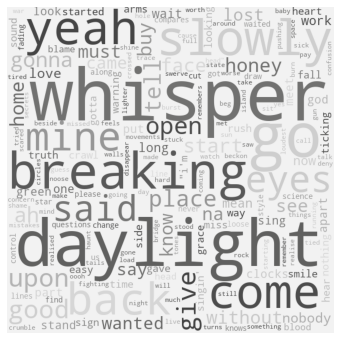

In [36]:
wordcloud = WordCloud(background_color=Colors['A Rush of Blood to the Head']['bg'],
                      width=600,
                      height=600,
                      colormap=cmap).generate_from_frequencies(words_plus_one)
#colormap=cmap, color_func=color_func
plt.figure(figsize=(9,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file("ARBH_WC.png")

In [37]:
images = [Image.open(x) for x in ['ARBH.jpg', 'ARBH_WC.png']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]

new_im.save('ARBH_Viz.jpg')